<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/CN_unidade5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Unidade 5 - Integração Numérica e EDOs




Nesta unidade, vamos estudar métodos numéricos para aproximar a integral de funções,
$$\int_a^b f(x)dx$$

e métodos numéricos para a solução de Equações Diferenciais Ordinárias (EDOs), 
$$\dfrac{d}{dt}x(t) = f(t,x)$$
onde $f(t,x)$ é um dado do problema. 

Para o primeiro problema estudaremos as fórmulas do **Trapézio**, **Simpson** e as **Fórmulas Gaussianas**. Para o segundo problema veremos os métodos de **Euler** e **Runge-Kutta** para uma equação e para um sistema de equações diferenciais ordinárias. A seguir, apresentamos alguns exemplos de resolução em *Python*. Vamos utilizar as bibliotecas [numpy](https://numpy.org/) e [scipy](https://scipy.github.io/devdocs/index.html).

# Integração Numérica

**Fórmula dos Trapézios**

$$\int_a^bf(x)dx \approx \dfrac{h}{2}[f(a)+f(b)]$$

**Algoritmo - Regra do Trapézio com repetição**



1.   Dados $h, f(x_i)$, para $i=0:n$.
2.   soma = 0
3.   Para $i=1:n-1$, faça
4.   $\hspace{1pc}$  soma $=$ soma $+ f(x_i)$
5.   $I_{TR}=\dfrac{h}{2}[2\cdot$soma $ +f(x_0) + f(x_n)]$

**Fórmula de Simpson**

$$\int_a^bf(x)dx \approx \dfrac{h}{3}\left[f(a)+4\cdot f(x_m)+f(b)\right]$$

**Algoritmo - Regra de Simpson com repetição**



1.   Dados $h, f(x_i)$, para $i=0:n$, com $n$ par.
2.   soma = 0
3.   Para $i=1,3,5,\ldots,n-1$, faça
4.   $\hspace{1pc}$  soma $=$ soma $ + 2\cdot f(x_i)+f(x_{i+1})$
5.   $I_{SIM}=\dfrac{h}{3}[2\cdot$soma $ +f(x_0) - f(x_n)]$




In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def f(x):
  return(1/x)

def trapezio(n, a, b):
  h = (b-a)/n
  x = np.arange(a, b+h, h)

  soma = 0
  for i in range(1,n):
    soma = soma + f(x[i])

  T = (h/2.0)*(2*soma + f(x[0]) + f(x[n]))

  return(T)

def simpson(n, a, b):
  h = (b-a)/n
  x = np.arange(a, b+h, h)
  #m = n//2
  somap = 0
  somai = 0
  for i in range(1,n//2):
    print(x[i])
    somai = somai + f(x[2*i-1])
    somap = somap + f(x[2*i])


  S = (h/3.0)*(2*somap + 4*somai + f(x[0]) - f(x[n]))

  return(S)



**Execício:** 

Corrigir a função **Fórmula de Simpson** no algoritmo acima ou reescrever o algoritmo no formato apresentado!

In [5]:
n = 4 #número de subintervalos
a = 1 # a e b extremos do intervalo de integração
b = 2

T = trapezio(n, a, b)
print(T)

S = simpson(n, a, b)
print(S)


0.6970238095238095
1.25
0.4194444444444444


# Solução Numérica de EDOs


**Método de Euler**

1.   Dados $y_0, \Delta t$ e $f(t, y)$.
2.   Para $k=0:n$, faça
3.   $\hspace{1pc}$  $y_{k+1}= y_k+ \Delta t\cdot f(t_k,y_k)$ 

**Método RK2**

1.   Dados $y_0, \Delta t$ e $f(t, y)$.
2.   Para $i=0:n$, faça
3.   $\hspace{1pc}$ $\kappa_1=f(t_i,y_i)$
4.   $\hspace{1pc}$ $\kappa_2=f(t_i+\Delta t,y_i+\Delta t\cdot \kappa_1)$
5.   $\hspace{1pc}$  $y_{i+1}= y_i+ \dfrac{\Delta t}{2}\left(\kappa_1+\kappa_2\right)$ 


**Método RK4**

1.   Dados $y_0, \Delta t$ e $f(t, y)$.
2.   Para $i=0:n$, faça
3. $\hspace{1pc}$ $\kappa_1=f(t_i,y_i)$
4.   $\hspace{1pc}$ $\kappa_2=f\left(t_i+\dfrac{\Delta t}{2},y_i+\dfrac{\Delta t}{2}\kappa_1\right)$
5.   $\hspace{1pc}$ $\kappa_3=f\left(t_i+\dfrac{\Delta t}{2},y_i+\dfrac{\Delta t}{2}\kappa_2\right)$
6.  $\hspace{1pc}$  $\kappa_4 = f(t_i+\Delta t, y_i+\Delta t\kappa_3)$
7. $\hspace{1pc}$ $y_{i+1}= y_i+ \dfrac{\Delta t}{6}\left(\kappa_1+2\kappa_2+2\kappa_3+\kappa_4\right)$ 


**Exemplo** 

$\dfrac{dx}{dt} = -y(t), \hspace{1pc} x(0)=1$

$\dfrac{dy}{dt} = x(t), \hspace{1pc}  y(0)=0$

In [6]:
def f(t,x,y):
  return (-y)

def g(t,x,y):
  return(x)

def euler(x0, y0, t, dt):
  x = np.zeros(N+1)
  y = np.zeros(N+1)
  x[0] = x0
  y[0] = y0
  for i in range(N):
    k1x = f(t[i],x[i],y[i])
    k1y = g(t[i],x[i],y[i])
    x[i+1] = x[i] + dt*k1x
    y[i+1] = y[i] + dt*k1y

  return (x,y)
  

def RK2(x0, y0, t, dt):
  
  x = np.zeros(N+1)
  y = np.zeros(N+1)
  x[0] = x0
  y[0] = y0
  for i in range(N):
    k1x = f(t[i],x[i],y[i])
    k1y = g(t[i],x[i],y[i])
    k2x = f(t[i]+dt,x[i]+dt*k1x,y[i]+dt*k1y)
    k2y = g(t[i]+dt,x[i]+dt*k1x,y[i]+dt*k1y)
    x[i+1] = x[i] + 0.5*dt*(k1x + k2x)
    y[i+1] = y[i] + 0.5*dt*(k1y + k2y)

  return(x,y)
    



No handles with labels found to put in legend.


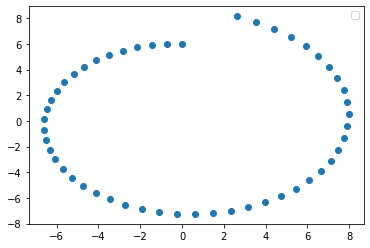

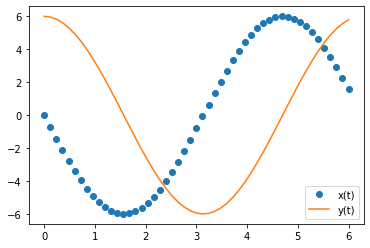

No handles with labels found to put in legend.


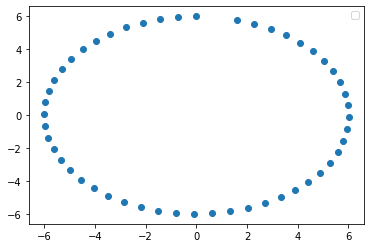

In [8]:
N = 50 #número de subintervalos
t0 = 0 # 
tN = 6
dt = (tN - t0)/N
t = np.arange(t0, tN+dt, dt)

[x, y] = euler(t0,tN, t, dt)

plt.figure(1)
plt.plot(x, y, 'o')
#plt.xlabel("Corrente")
#plt.ylabel("Voltagem")
plt.legend()
plt.show()

[x, y] = RK2(t0,tN,t, dt)

plt.figure(2)
plt.plot(t, x, 'o', label='x(t)')
plt.plot(t, y, label='y(t)')
#plt.xlabel("Corrente")
#plt.ylabel("Voltagem")
plt.legend()
plt.show()

plt.figure(3)
plt.plot(x, y, 'o')
#plt.xlabel("Corrente")
#plt.ylabel("Voltagem")
plt.legend()
plt.show()